In [20]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from proj1_helpers import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
import matplotlib.pyplot as plt

In [62]:
path_tr = "../data/train.csv"
yb_tr, data_tr, ids_tr = load_csv_data(path_tr,False)

In [66]:
yb_tr = column_array(yb_tr)

In [77]:
nparts = 4
ys, txs, inds, boolind = eq_split_data(yb_tr, data_tr,nparts)

In [120]:
degrees = np.array([1,2,3,4,5,6,7,8,9,10])
lambdas = np.linspace(0,1,11)
lambdas = np.append(lambdas,np.linspace(2,20,19))

In [121]:
max_iters = 1000
gamma = 0.2
batch_size = 10
eps = 1e-3
mode = "ls"

In [122]:
losses_tr = np.zeros([len(degrees),len(lambdas),nparts])
losses_te = np.zeros([len(degrees),len(lambdas),nparts])

In [ ]:
for ideg, deg in enumerate(degrees):
    for ilam, lambda_ in enumerate(lambdas):
        for part in range(nparts):
            # chose parts
            y_tr = yb_tr[boolind[:,part]]
            x_tr = data_tr[boolind[:,part],:]
            y_te = yb_tr[np.logical_not(boolind[:,part])]
            x_te = data_tr[np.logical_not(boolind[:,part]),:]
            # preprocess parts
            tx_tr, mean, std = standardize(x_tr)
            tx_te, mean, std = standardize(x_te,mean,std)
            tx_tr = poly_expansion(tx_tr,deg,True)
            tx_te = poly_expansion(tx_te,deg,True)
            # compute w and loss
            w,loss = my_ridge_regression(y_tr,tx_tr,lambda_,mode,max_iters,gamma,batch_size,eps)
            losses_tr[ideg,ilam,part] = compute_loss(y_tr,tx_tr,w, mode='log')
            losses_te[ideg,ilam,part] = compute_loss(y_te,tx_te,w, mode='log')

In [94]:
loss_tr = np.mean(loss_tr,axis=2)
loss_te = np.mean(loss_te,axis=2)

In [96]:
print(loss_tr)
print(loss_te)

[[0.254964 0.264432 0.271804 0.2768   0.281224 0.285172 0.288372 0.291432
  0.293876 0.29632  0.298592]
 [0.228216 0.243592 0.248072 0.25232  0.256368 0.259916 0.263004 0.265756
  0.267792 0.269744 0.271464]
 [0.339316 0.23454  0.23902  0.243456 0.247328 0.250512 0.252952 0.255096
  0.256892 0.258512 0.260072]]
[[0.25531467 0.26467733 0.271692   0.27697333 0.281512   0.28508133
  0.28832533 0.29131067 0.29397733 0.29623467 0.29854533]
 [0.228764   0.24368    0.24818933 0.25267467 0.256596   0.26016667
  0.26308    0.26569067 0.26813333 0.270064   0.27162133]
 [0.33953467 0.235172   0.239636   0.24378933 0.24754933 0.25067867
  0.253444   0.25557067 0.25719467 0.25864133 0.26016133]]


In [98]:
from plots import *

Degree =  1
Degree =  2
Degree =  3


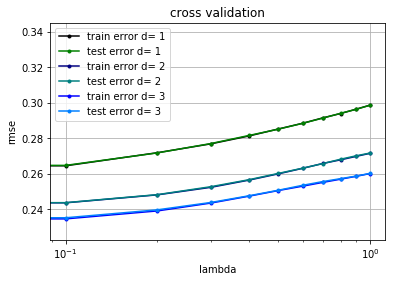

In [119]:
for ideg, deg in enumerate(degrees):
    print("Degree = ",deg)
    cross_validation_visualization(lambdas, loss_tr[ideg,:], loss_te[ideg,:],"d= " +str(deg),([0, 0,ideg/(len(degrees)-1)]),([0, 0.5,ideg/(len(degrees)-1)]))